In [4]:
from tensorflow import keras
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [5]:
(x_train,y_train),(x_test,y_test) = imdb.load_data()

In [6]:
x_train.shape

(25000,)

In [7]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [8]:
from keras.utils import pad_sequences
x_train = pad_sequences(x_train,padding = 'post',maxlen=500)
x_test = pad_sequences(x_test,padding = 'post',maxlen=500)

In [9]:
x_train.shape

(25000, 500)

In [10]:
model = Sequential()

model.add(SimpleRNN(32,input_shape=(500,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.5063 - loss: 0.6936 - val_accuracy: 0.5100 - val_loss: 0.6934
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 104ms/step - accuracy: 0.5001 - loss: 0.6939 - val_accuracy: 0.5055 - val_loss: 0.6931
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.5045 - loss: 0.6938 - val_accuracy: 0.4998 - val_loss: 0.6931
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.5089 - loss: 0.6932 - val_accuracy: 0.5007 - val_loss: 0.6933
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.5002 - loss: 0.6937 - val_accuracy: 0.5050 - val_loss: 0.6930
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 98ms/step - accuracy: 0.5035 - loss: 0.6936 - val_accuracy: 0.4995 - val_loss: 0.6936
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 98ms/step - accuracy: 0.5011 - loss: 0.6943 - val_accuracy: 0.5004 - val_loss: 0.6953
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 104ms/step - accuracy: 0.5136 - loss: 0.6

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5138 - loss: 0.6930
Test accuracy: 0.5051199793815613


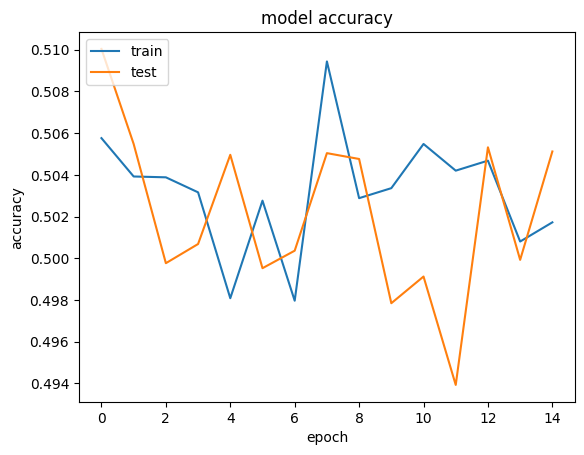

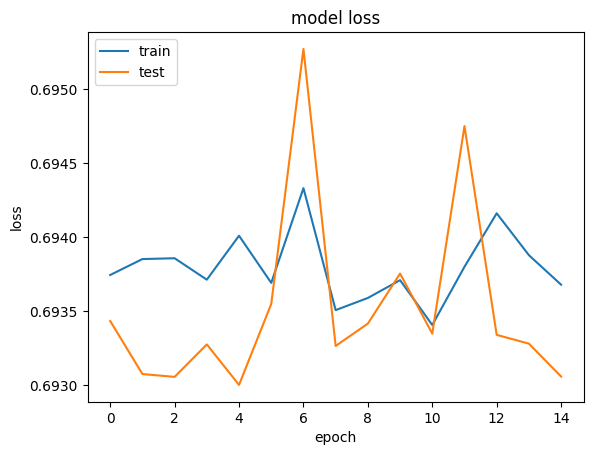

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()